In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup, run_box_NObreakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
NUMBA_DISABLE_JIT = 1

from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, ExponFrag, AlwaysN
from PySDM.physics.constants import si
import PySDM.physics.constants as const
from PySDM.physics.trivia import Trivia

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9904151e+05 0.0000000e+00 9.9904151e+05 0.0000000e+00]
 [9.4401000e+02 0.0000000e+00 9.4401000e+02 0.0000000e+00]]
finished Ec=0.98
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.32780258e+12 0.00000000e+00 5.21519366e+12 3.57396039e+12]
 [2.50488670e+14 0.00000000e+00 2.46201480e+14 9.59993323e+13]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.27684003e+14 0.00000000e+00 2.16233146e+14 1.19327567e+14]
 [1.81785331e+15 0.00000000e+00 1.72387641e+15 5.16873717e+14]]
finished Ec=0.9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.03244858e+14 0.00000000e+00 8.18620619e+14 4.94669494e+14]
 [9.99092627e+14 0.00000000e+00 8.93895658e+14 6.86907979e+13]]
finished Berry
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.24625218e+15 5.59000000e+00 1.00564182e+06 5.02886701e+14]
 [2.20534375e+15 0.00000000e+00 0.00000000e+0

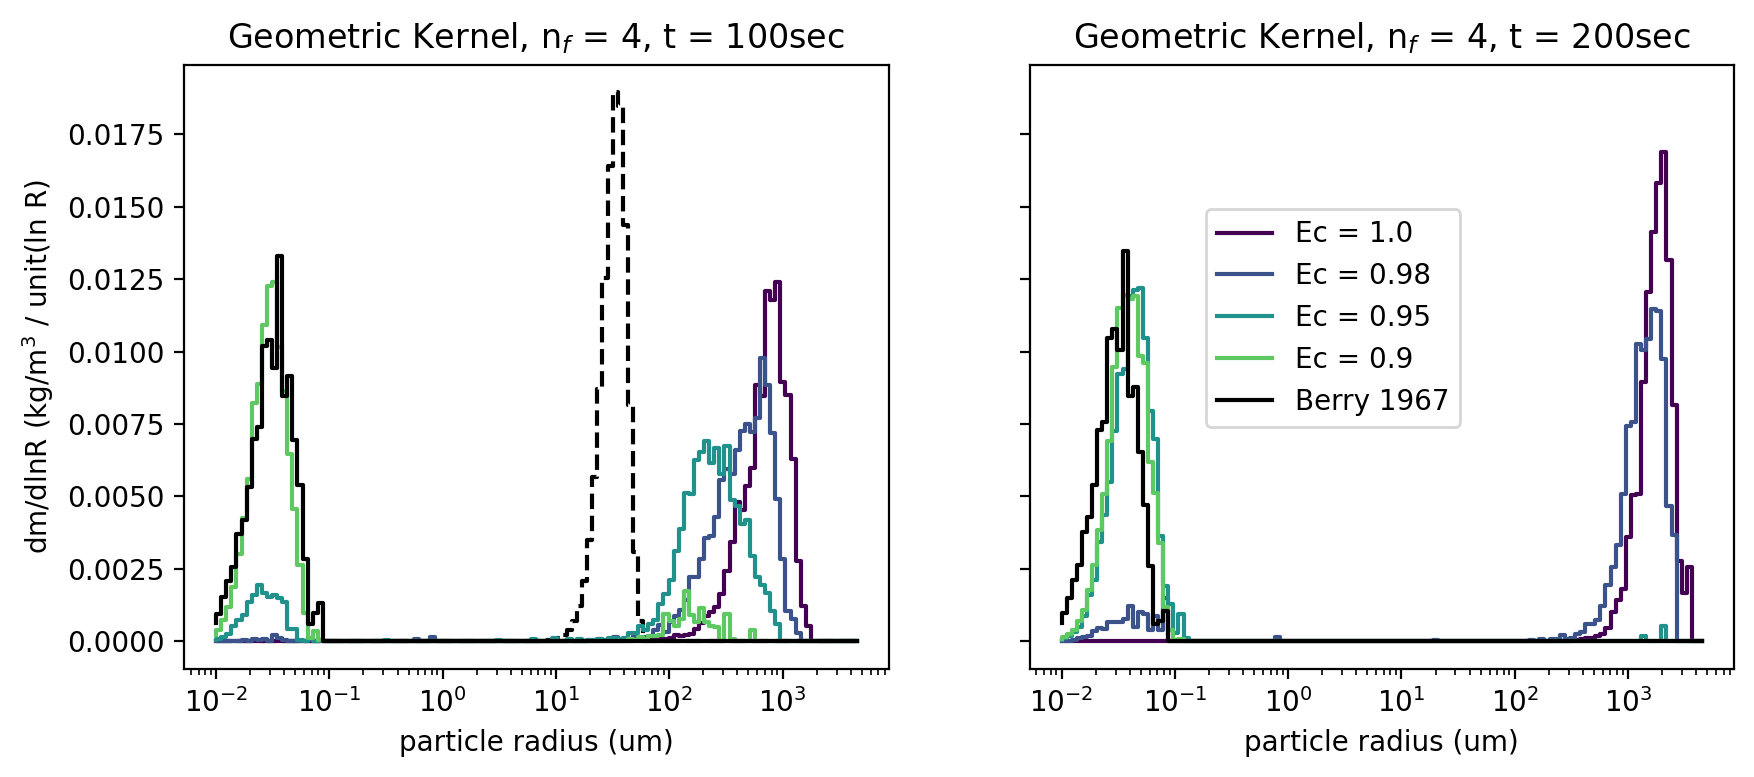

In [28]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
import numpy as np

settings = Settings()

settings.fragmentation = AlwaysN(n=4)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.98, 0.95, 0.9]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='k', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend(loc=(0.25, 0.4))
ax[0].set_title("Geometric Kernel, n$_f$ = 4, t = 100sec")
ax[1].set_title("Geometric Kernel, n$_f$ = 4, t = 200sec")
pyplot.savefig('figures/geometric_Ec_sensitivity.png')

finished Ec=1.0
[[     0.              0.              0.              0.        ]
 [411158.07083333      0.         411158.07083333      0.        ]
 [  9778.25833333      0.           9778.25833333      0.        ]]
finished Ec=0.98
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.91471228e+11 0.00000000e+00 6.72530464e+11 4.11041354e+11]
 [3.85485570e+13 0.00000000e+00 3.77328994e+13 2.33006157e+13]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.37451144e+11 0.00000000e+00 8.10512517e+11 1.00134870e+12]
 [2.07202793e+14 0.00000000e+00 1.96914484e+14 1.19948960e+14]]
finished Ec=0.9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.47401957e+12 0.00000000e+00 4.05314123e+12 5.06059146e+12]
 [1.41390067e+15 0.00000000e+00 1.27246689e+15 4.54203267e+14]]
finished Berry
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.69422755e+15 0.00000000e+00 4.63287621e+05 2.11084108e+14]
 [4.15935927e+15 0.00

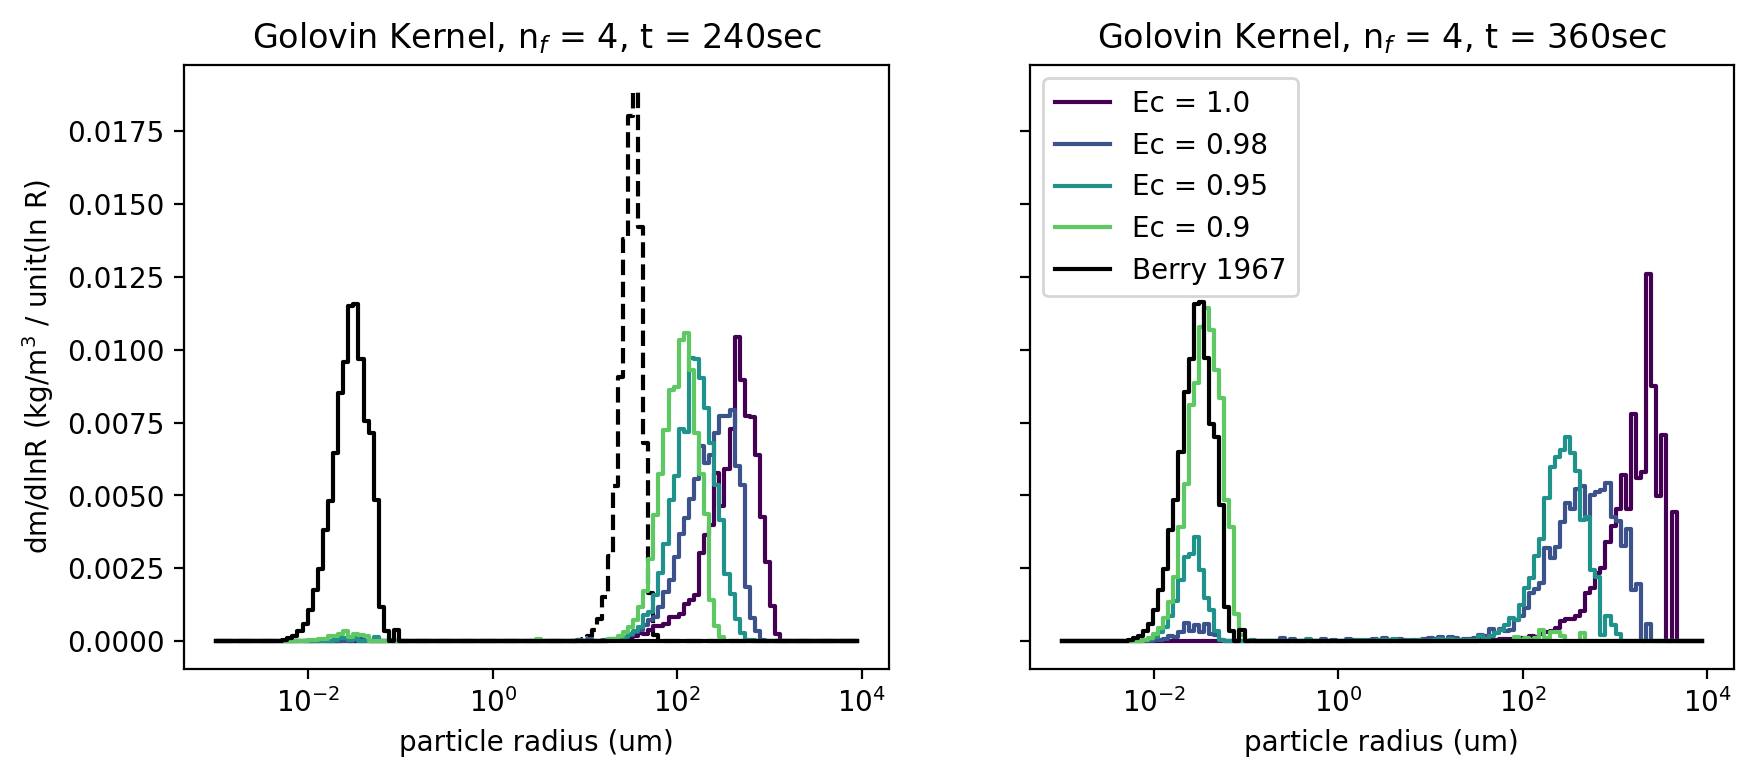

In [51]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.collision_kernels import Golovin
import numpy as np

settings = Settings()

settings.fragmentation = AlwaysN(n=4)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.001 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
        )
settings.kernel = Golovin(b = 1500 / si.s)

settings.warn_overflows = False
t_steps = [0, 240, 360]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.98, 0.95, 0.9]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='k', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[0].set_title("Golovin Kernel, n$_f$ = 4, t = " + str(t_steps[1]) + "sec")
ax[1].set_title("Golovin Kernel, n$_f$ = 4, t = " + str(t_steps[2]) + "sec")
pyplot.savefig('figures/golovin_Ec_sensitivity.png')

finished Ec=1.0
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.31978108e+05 0.00000000e+00 8.31978108e+05 0.00000000e+00]
 [4.48816667e+02 0.00000000e+00 4.48816667e+02 0.00000000e+00]]
finished Ec=0.98
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.79630764e+11  2.03450000e+02  5.78823391e+11  2.55118989e+11]
 [ 8.76481679e+14 -1.19788858e+16  8.57310532e+14  2.56465061e+14]]
finished Ec=0.95
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.60308728e+15 -9.92770441e+15  7.20841930e+15  2.14932354e+15]
 [ 1.40867889e+16  3.55300698e+16  1.33838119e+16  3.96028444e+15]]
finished Ec=0.9
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.84672667e+16  1.59922396e+15  4.35989575e+16  1.28439816e+16]
 [-2.58883078e+16  2.47520259e+16 -3.10095952e+16  1.34827573e+16]]
finished Berry
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.21705087e+16 -2.73840486e+16  1.40242573e+06  5.086

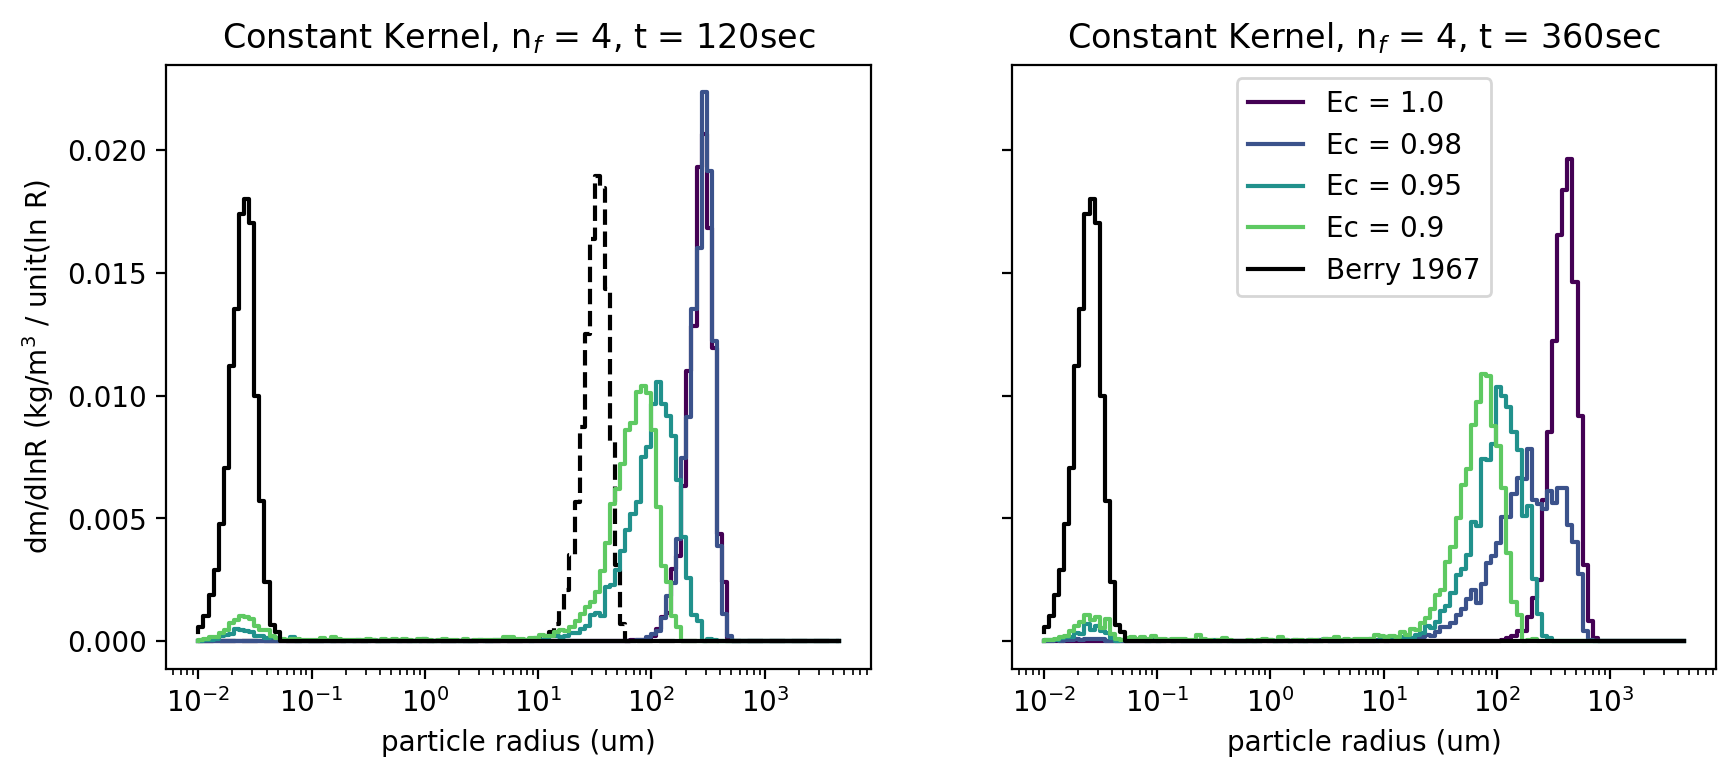

In [46]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
from PySDM.dynamics.collisions.collision_kernels import ConstantK
import numpy as np

settings = Settings()

settings.fragmentation = AlwaysN(n=4)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
settings.kernel = ConstantK(a = 1e-1 * si.cm**3 / si.s)

settings.warn_overflows = False
t_steps = [0, 120, 360]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.98, 0.95, 0.9]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='k', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[0].set_title("Constant Kernel, n$_f$ = 4, t = " + str(t_steps[1]) + "sec")
ax[1].set_title("Constant Kernel, n$_f$ = 4, t = " + str(t_steps[2]) + "sec")
pyplot.savefig('figures/constantK_Ec_sensitivity.png')

## Sensitivity to n_f

finished nf=1
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9900831e+05 0.0000000e+00 9.4894394e+05 5.0064370e+04]
 [9.6873000e+02 0.0000000e+00 9.1877000e+02 4.9960000e+01]]
finished nf=2
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04944476e+06 0.00000000e+00 9.98049710e+05 5.16416700e+04]
 [2.02018000e+03 0.00000000e+00 1.92419000e+03 1.05420000e+02]]
finished nf=3
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.19814902e+12 0.00000000e+00 3.97254727e+12 6.91670062e+12]
 [1.56237770e+15 0.00000000e+00 1.48148043e+15 1.29246931e+15]]
finished nf=4
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.27684003e+14 0.00000000e+00 2.16233146e+14 1.19327567e+14]
 [1.81785331e+15 0.00000000e+00 1.72387641e+15 5.16873717e+14]]
finished nf=6
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.27863254e+14 0.00000000e+00 8.81988863e+14 1.77841483e+14]
 [1.06951747e+15 0.00000000e+00 1.01348152e+15 8.0008051

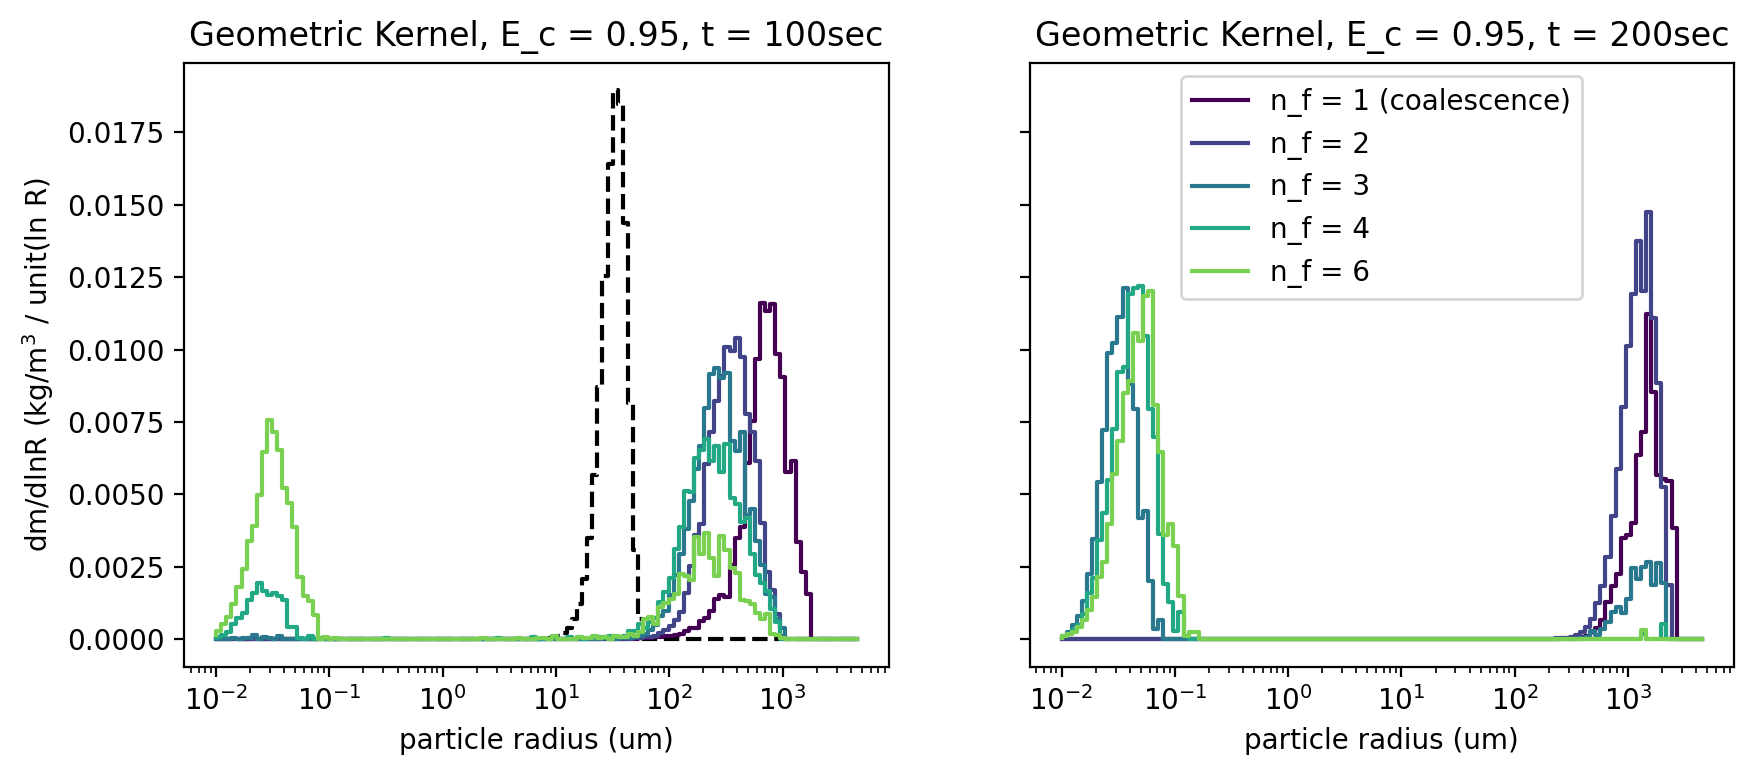

In [55]:
settings = Settings()

settings.coal_eff = ConstEc(Ec=0.95)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

nf_vals = [1, 2, 3, 4, 6]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#pyplot.plot(x[0],y[0,0]*settings.rho, color='k', label='final')

for (i, nf) in enumerate(nf_vals):
    settings.fragmentation = AlwaysN(n=nf)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += ' (coalescence)'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[1].legend()
ax[0].set_title("Geometric Kernel, E_c = 0.95, t = " + str(t_steps[1]) + "sec")
ax[1].set_title("Geometric Kernel, E_c = 0.95, t = " + str(t_steps[2]) + "sec")

pyplot.savefig('geometric_nf_sensitivity.png')

## Sensitivity to n_f distribution parameters

In [1]:
from PySDM.physics.constants import si

settings = Settings()
t_steps = [0, 100]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
X0 = settings.X0
mu_vals = [X0] #, X0/2, 2*X0]
sigma = X0 / 4
vmin = X0 * 1e-3
nfmax = 8
Ec = 0.95

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = ExponFrag(scale=mu, vmin=vmin, nfmax=nfmax)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        pyplot.step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
# pyplot.annotate('t=0s',(10.0, 0.0175))
# pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
# pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel with Ec = 0.95, Exponential Fragmentation")
pyplot.savefig('figures/exp_mu_sensitivity.png')


NameError: name 'Settings' is not defined

In [ ]:
from PySDM.dynamics.collisions.breakup_fragmentations import ExponFrag, Gaussian
from PySDM.physics.constants import si

settings = Settings()
t_steps = [0, 60, 240]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

mu_vals = [10, 100]

pyplot.figure(figsize=(6,4),dpi=200)
for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = Gaussian(mu = mu * si.micrometres, scale= mu / 2 * si.micrometres)
    print(settings.fragmentation.scale)
    (x,y) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        lbl = 'mu = ' + str(mu) + 'um'
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.annotate('t=0s',(10.0, 0.0175))
pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel with Berry 1967 Efficiency, Gaussian Fragmentation")
pyplot.savefig('figures/gaussian_mu_sensitivity.png')
